In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#生成非线性数据
X, y = datasets.make_moons(noise = 0.15, random_state = 666)
plt.scatter(X[y == 0, 0], X[y ==0, 1], color = 'red')
plt.scatter(X[y == 1, 0], X[y ==1, 1], color = 'blue')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
def RBFKernelSVC(gamma = 1.0):
    return Pipeline([
        ("standardScaler", StandardScaler()),
        ("svc", SVC(kernel = 'rbf', gamma = gamma))
    ])

In [3]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('standardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [4]:
#绘制决策边界
def plot_decision_boundary(model, axis):#axis中有4个元素（其实就是X轴Y轴的范围）
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


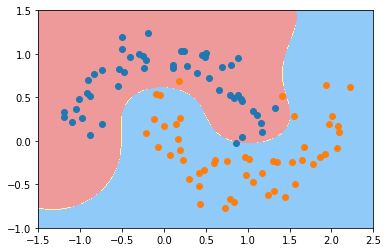

In [5]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show() #拟合的还不错

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


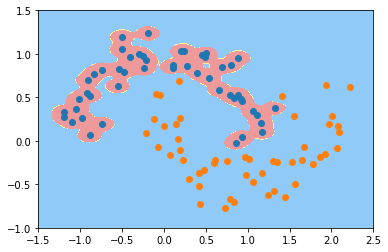

In [6]:
#gamma = 100时
svc2 = RBFKernelSVC(gamma=100)
svc2.fit(X, y)
plot_decision_boundary(svc2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show() #明显过拟合

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


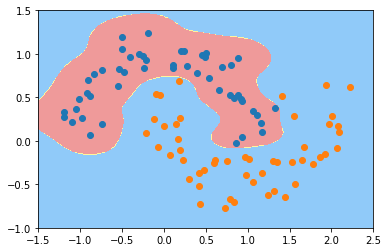

In [7]:
#gamma = 10时
svc3 = RBFKernelSVC(gamma=10)
svc3.fit(X, y)
plot_decision_boundary(svc3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


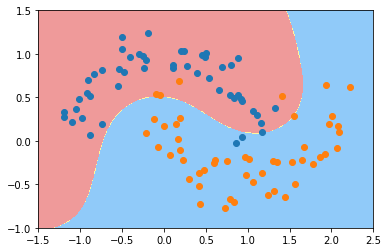

In [8]:
#gamma = 0.5时
svc4 = RBFKernelSVC(gamma=0.5)
svc4.fit(X, y)
plot_decision_boundary(svc4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()#欠拟合

gamma相当于调节模型的复杂度。gamma越小则复杂度越低越欠拟合,gamma值越大越复杂越容易过拟合